In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Definieer wat waardes voor je k's
k1 = 1000000       # kon for E + S to ES
k2 = 0.06                # koff for ES to E + S
k3 = 100000000
k4 = 10
k5 = 0.001
k6 = 0
kcat = 0.0009

# Definieer de concentraties op T=0 (in eerste instantie: voor inhibitie of substraat)
E0 = 5*10**-9
ES0 = 0
P0 = 0
EI0 = 0
EIi0 = 0  #(EI*)

#Definieer constanten
I = 0*10**-9
S0 = 495*10**-9
dt = 0.001 #Dit is hoe groot je simulatie tijdstappen zijn

tframe = 60 #save a frame every 60 s
tincub = 0 #incubate for 1800 s
tsub =10800  # Run with substrate for 1800 s

In [0]:
concentraties = np.array([E0, ES0, P0, EI0, EIi0], dtype=np.double) #matrix van concentraties

In [0]:
# Voor toevoeging van S

S=0 # Geen S in je systeem

                        # [         E,       ES, P,     EI, EI*]
tijdevolutie0 = np.array([[-k3*I-k1*S,  k2+kcat, 0,     k4,   0],  #E
                          [      k1*S, -k2-kcat, 0,      0,   0],  #ES
                          [         0,     kcat, 0,      0,   0],  #P
                          [      k3*I,        0, 0, -k4-k5,  k6],  #EI
                          [         0,        0, 0,     k5, -k6]]) #EI*

#verandering in E   = [E]*(-k3*I-k1*S) + [ES]*(k2+kcat)  + [P]*(0) + [EI]*(k4)     + [EI*]*(0)
#verandering in ES  = [E]*(k1*S)       + [ES]*(-k2-kcat) + [P]*(0) + [EI]*(0)      + [EI*]*(0)
#verandering in P   = [E]*(0)          + [ES]*(kcat)     + [P]*(0) + [EI]*(0)      + [EI*]*(0)
#verandering in EI  = [E]*(k3*I)       + [ES]*(0)        + [P]*(0) + [EI]*(-k4-k5) + [EI*]*(k6)
#verandering in EI* = [E]*(0)          + [ES]*(0)        + [P]*(0) + [EI]*(k5)     + [EI*]*(-k6)

In [0]:
# Maak een lijst van kopien van de concentraties
plot = [concentraties.copy()]

tijdconc = concentraties
t = 0
# Voor toevoging van S (tincub/dt stappen = 30min)
for i in range(int(tincub/dt)):
    t+= 1
    tijdconc += np.dot(tijdevolutie0*dt, tijdconc) # Doe 1 dt tijdstap
    if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

    
    if t % int(tframe/dt)==0:
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst
  
# Na toevoeging van S (tsub/dt stappen)
for i in range(int(tsub/dt)):
    t += 1
    S= S0-(tijdconc[2]+tijdconc[1]) #Subtract P and ES from S
    tijdevolutie1 = np.array([[-k3*I-k1*S, k2+kcat, 0, k4, 0],
                         [k1*S, -k2-kcat, 0, 0, 0],
                         [0, kcat, 0, 0, 0],
                         [k3*I, 0, 0, -k4-k5, k6],
                         [0, 0, 0, k5, -k6]])
    tijdconc += np.dot(tijdevolutie1*dt, tijdconc) #Doe 1 dt tijdstap
    if (tijdconc < 0).any():
        raise ValueError("got a negative concentration, try decreasing dt")

    
    if t % int(tframe/dt)==0:
        plot.append(tijdconc.copy()) # Voeg de nieuwe concentraties toe aan de lijst


In [0]:
# Splits de lijst van figuren in E, ES, P, EI en EI*
Eplot = [] 
ESplot = []
Pplot = []
EIplot = []
EIiplot = []
EItot = []
for frame in plot:
    Eplot.append(frame[0])
    ESplot.append(frame[1])
    Pplot.append(frame[2])
    EIplot.append(frame[3])
    EIiplot.append(frame[4])
    EItot.append(frame[3]+frame[4]) 

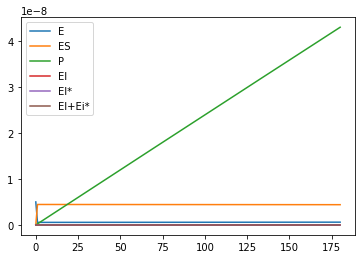

In [12]:
# Plot de figuren
labels = ('E', 'ES', "P", "EI", "EI*", "EI+Ei*")
for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    plt.plot(y, label=labels[i])
plt.legend()

(0, 5e-09)

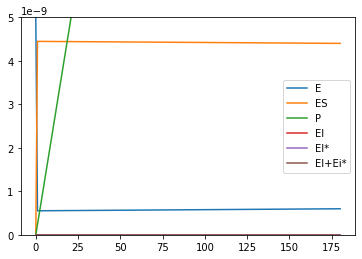

In [13]:
# Plot de figuren
labels = ('E', 'ES', "P", "EI", "EI*", "EI+Ei*")
for i,y in enumerate((Eplot, ESplot, Pplot, EIplot, EIiplot, EItot)):
    plt.plot(y, label=labels[i])
plt.legend()
plt.ylim(0,E0) #zoom in tot E0

In [14]:
print(Eplot)

[5e-09, 5.524042963473542e-10, 5.526448339622991e-10, 5.528855679029826e-10, 5.531264983978605e-10, 5.533676256757491e-10, 5.536089499657995e-10, 5.538504714975065e-10, 5.540921905007011e-10, 5.54334107205557e-10, 5.545762218425899e-10, 5.548185346426568e-10, 5.550610458369318e-10, 5.553037556570044e-10, 5.555466643347398e-10, 5.557897721023697e-10, 5.560330791924688e-10, 5.562765858379606e-10, 5.56520292272111e-10, 5.567641987285341e-10, 5.570083054411969e-10, 5.572526126444056e-10, 5.574971205728191e-10, 5.577418294614489e-10, 5.579867395456529e-10, 5.5823185106114e-10, 5.584771642439711e-10, 5.587226793305551e-10, 5.589683965576595e-10, 5.592143161623997e-10, 5.594604383822492e-10, 5.597067634550305e-10, 5.599532916189313e-10, 5.602000231124829e-10, 5.604469581745789e-10, 5.606940970444686e-10, 5.609414399617591e-10, 5.61188987166415e-10, 5.614367388987595e-10, 5.616846953994765e-10, 5.619328569096099e-10, 5.621812236705645e-10, 5.624297959241013e-10, 5.626785739123495e-10, 5.629275

In [0]:
import pandas as pd

In [0]:
dataframe = pd.DataFrame(data={'E':Eplot,  "EI":EIplot, "EIi":EIiplot, "ES":ESplot, "P":Pplot})

In [17]:
print(dataframe.to_csv())

,E,EI,EIi,ES,P
0,5e-09,0.0,0.0,0.0,0.0
1,5.524042963473542e-10,0.0,0.0,4.447595703652594e-09,2.329538179216289e-10
2,5.526448339622991e-10,0.0,0.0,4.447355166037652e-09,4.731174923944603e-10
3,5.528855679029826e-10,0.0,0.0,4.44711443209697e-09,7.132681725364073e-10
4,5.531264983978605e-10,0.0,0.0,4.4468735016020845e-09,9.534058477397102e-10
5,5.533676256757491e-10,0.0,0.0,4.446632374324197e-09,1.1935305073842641e-09
6,5.536089499657995e-10,0.0,0.0,4.446391050034136e-09,1.433642140837619e-09
7,5.538504714975065e-10,0.0,0.0,4.446149528502435e-09,1.6737407374548985e-09
8,5.540921905007011e-10,0.0,0.0,4.445907809499241e-09,1.91382628657886e-09
9,5.54334107205557e-10,0.0,0.0,4.445665892794387e-09,2.153898777539815e-09
10,5.545762218425899e-10,0.0,0.0,4.445423778157356e-09,2.393958199655684e-09
11,5.548185346426568e-10,0.0,0.0,4.445181465357296e-09,2.6340045422318844e-09
12,5.550610458369318e-10,0.0,0.0,4.4449389541628136e-09,2.874037794561343e-09
13,5.553037556570044e-10,0.0,0.0,4.444696244